In [1]:
# In[0]: IMPORTS, SETTINGS
import sklearn 
assert sklearn.__version__ >= "0.20" # sklearn ≥0.2 is required
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(42) # to output the same across runs
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.svm import LinearSVC 

In [10]:
np.random.seed(42)
m = 30 
X = 4*np.random.rand(m, 1) -2
y = (4 + 3*X**2 + X + np.random.randn(m, 1)).ravel()

# 6.2. Fit Linear SVM regressors
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=2.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2 = LinearSVR(epsilon=0.4, random_state=42)      
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.4, random_state=42)

In [15]:
def plot_svm_regression(svm_reg, X, y, axes):
    # Plot model, margins
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=3, label=r"Hypothesis $\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "b--", linewidth=1, label="Margins")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "b--", linewidth=1)
    
    # Mask violated samples:
    #plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    # Plot samples:
    plt.plot(X, y, "bo")
    
    plt.axis(axes)

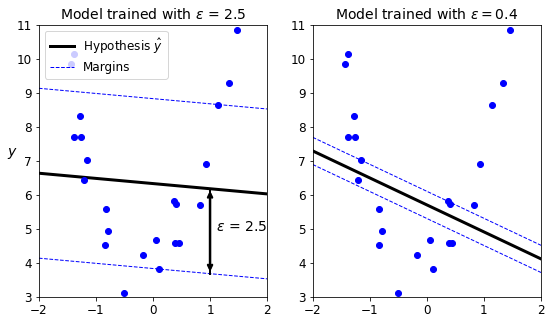

In [22]:

let_plot=True
if let_plot:
    plt.figure(figsize=(9, 5))
    plt.subplot(1,2,1)
    xylim = [-2, 2, 3, 11]
    plot_svm_regression(svm_reg1, X, y, xylim)
    # Plot epsilon:
    x1_esp = 1
    y_esp = svm_reg1.predict([[x1_esp]])
    plt.plot([x1_esp, x1_esp], [y_esp, y_esp - svm_reg1.epsilon], "k-", linewidth=2)
    plt.annotate( '', xy=(x1_esp, y_esp), xycoords='data',
            xytext=(x1_esp, y_esp - svm_reg1.epsilon),
            textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 2.5}  )
    plt.text(x1_esp+.1, y_esp-svm_reg1.epsilon/2, r"$\epsilon$ = {}".format(svm_reg1.epsilon), fontsize=14)
    plt.legend(loc="upper left", fontsize=12)
    plt.title(r"Model trained with $\epsilon$ = {}".format(svm_reg1.epsilon), fontsize=14)
    plt.ylabel(r"$y$", fontsize=14, rotation=0)
    
    plt.subplot(1,2,2)
    plot_svm_regression(svm_reg2, X, y, xylim) 
    plt.title(r"Model trained with $\epsilon = {}$".format(svm_reg2.epsilon), fontsize=14)
    plt.savefig("figs/05_SVM_reg_epsilon");
    plt.show()


In [23]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, epsilon=0.2, C=0.01, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2 = SVR(kernel="poly", degree=2, epsilon=0.2, C=1, gamma="scale")
svm_poly_reg2.fit(X, y)
svm_poly_reg3 = SVR(kernel="poly", degree=2, epsilon=1, C=0.01, gamma="scale")
svm_poly_reg3.fit(X, y)
svm_poly_reg4 = SVR(kernel="poly", degree=2, epsilon=1, C=1, gamma="scale")
svm_poly_reg4.fit(X, y)

SVR(C=1, degree=2, epsilon=1, kernel='poly')

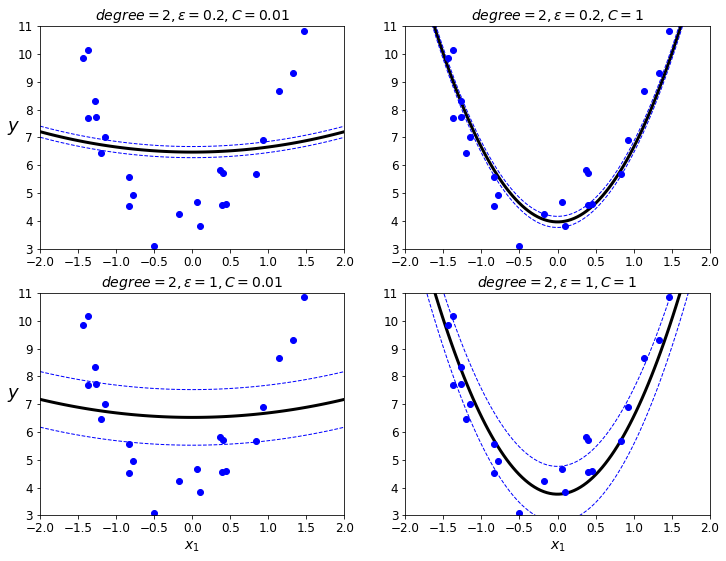

In [24]:
if let_plot:
    plt.figure(figsize=(12, 9))
    plt.subplot(2,2,1)
    xylim = [-2, 2, 3, 11]
    plot_svm_regression(svm_poly_reg1, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg1.degree, svm_poly_reg1.epsilon, svm_poly_reg1.C), fontsize=14)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    
    plt.subplot(2,2,2)
    plot_svm_regression(svm_poly_reg2, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg2.degree, svm_poly_reg2.epsilon, svm_poly_reg2.C), fontsize=14)
    
    plt.subplot(2,2,3)
    plot_svm_regression(svm_poly_reg3, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg3.degree, svm_poly_reg3.epsilon, svm_poly_reg3.C), fontsize=14)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.xlabel(r"$x_1$", fontsize=14)
    
    plt.subplot(2,2,4)
    plot_svm_regression(svm_poly_reg4, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg4.degree, svm_poly_reg4.epsilon, svm_poly_reg4.C), fontsize=14)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.show()

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # sepal length, sepal width, petal length, petal width
y = iris["target"]

In [2]:
import random
import numpy as np
def generate_fist_data():
    fish = []
    count = 0
    for i in range(0, 40):
        length = random.uniform(40, 60)
        width = random.uniform(20, 30)
        height = random.uniform(5, 30)
        fish.append([round(length, 2), round(width, 2), round(height,2)])


    for i in range(0, 40):
        length = random.uniform(4, 20)
        width = random.uniform(3,  9)
        height = random.uniform(5, 18)
        fish.append([round(length, 2), round(width, 2), round(height,2)])


    for i in range(0, 40):
        length = random.uniform(50, 60)
        width = random.uniform(10, 50)
        height = random.uniform(20, 80)
        fish.append([round(length, 2), round(width, 2), round(height,2)])

    for i in range(0, 40):

        length = random.uniform(10, 40)
        width = random.uniform(3, 8)
        height = random.uniform(6, 17)
        fish.append([round(length, 2), round(width, 2), round(height,2)])


    target = []
    for i in range(0, 160):
        if i < 40:
            target.append(0)
        elif i < 80 and i > 40:
            target.append(1)
        elif i < 120 and i > 80:
            target.append(2)
        else:
            target.append(3)      
    target_names = ['koi', 'arowana', 'shark', 'tilapia']
    feature_names = ['length (cm)', 'width (cm)', 'height (cm)']
    fish_data = {'data': np.array(fish), 'target': np.array(target), 'target_names': np.array(target_names), 'feature_names': np.array(feature_names)}
    return fish_data

In [3]:
fish_data = generate_fist_data()
X = fish_data["data"][:, (0, 1)]  # length, width
y = fish_data["target"]
koi_or_arowana = (y == 0) | (y == 1)
X = X[koi_or_arowana]  
y = y[koi_or_arowana]

def plot_samples(subplot, with_legend=False, with_ylabel=False):
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b^", label="Arowana")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go", label="Koi")
  plt.xlabel("Body length", fontsize=14)
  plt.axis([0, 70, 0, 35])
  if with_legend: plt.legend(loc="upper left", fontsize=14)
  if with_ylabel: plt.ylabel("Body width", fontsize=14)

In [4]:

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Plot decision boundary:
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]        
    x1 = np.linspace(xmin, xmax, 200)
    x2 = -w[0]/w[1]*x1 - b/w[1] # Note: At the decision boundary, w1*x1 + w2*x2 + b = 0 => x2 = -w1/w2 * x1 - b/w2
    plt.plot(x1, x2, "k-", linewidth=3, label="SVM")
    
    # Plot gutters of the margin:
    margin = 1/w[1]
    right_gutter = x2 + margin
    left_gutter = x2 - margin
    plt.plot(x1, right_gutter, "k:", linewidth=2)
    plt.plot(x1, left_gutter, "k:", linewidth=2)


    # Highlight samples at the gutters (support vectors):
    skipped=True
    if not skipped:
        hinge_labels = y*2 - 1 # hinge loss label: -1, 1. our label y: 0, 1
        scores = X.dot(w) + b
        support_vectors_id = (hinge_labels*scores < 1).ravel()
        svm_clf.support_vectors_ = X[support_vectors_id]      
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
        


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


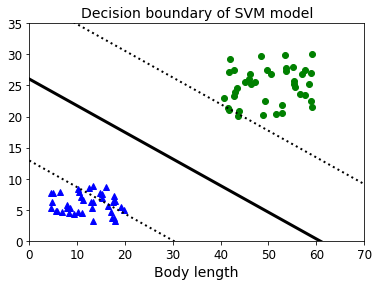

In [5]:
from sklearn.svm import LinearSVC # faster than SVC on large datasets
svm_clf = LinearSVC(C=np.inf) # C: larger => 'harder margins'. loss = 'hinge': a loss of SVM
svm_clf.fit(X, y)
svm_clf.predict(X) # Predicted labels

plot_samples(subplot='133')
plot_svc_decision_boundary(svm_clf, 0, 100)
plt.title("Decision boundary of SVM model", fontsize=14)
plt.savefig("figs/01_Decision_boundaries_LinearSVC_fish.png")
plt.show()

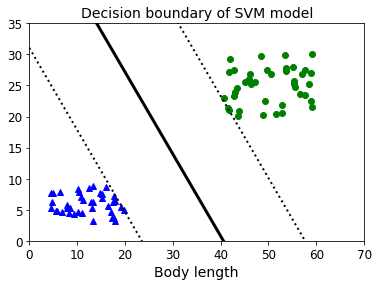

In [7]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', C=100, gamma=0.001)
svm_clf.fit(X, y)
svm_clf.predict(X) # Predicted labels

plot_samples(subplot='133')
plot_svc_decision_boundary(svm_clf, 0, 100)
plt.title("Decision boundary of SVM model", fontsize=14)
plt.savefig("figs/01_Decision_boundaries_SVC_fish.png")
plt.show()

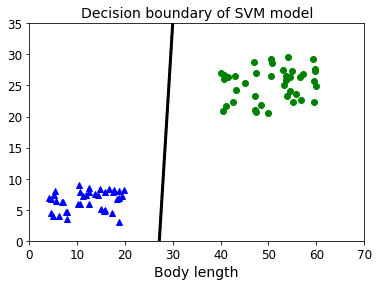

In [38]:
from sklearn.linear_model import SGDClassifier
svm_clf = SGDClassifier(epsilon=1, random_state=42)
svm_clf.fit(X, y)
svm_clf.predict(X) # Predicted labels
plot_samples(subplot='133')
plot_svc_decision_boundary(svm_clf, 0, 100)
plt.title("Decision boundary of SVM model", fontsize=14)
plt.savefig("figs/01_Decision_boundaries_SGDClassifier_fish.png")
plt.show()

In [7]:
import numpy as np
np.random.seed(42)
m = 30 
X = 4*np.random.rand(m, 1) -2
y = (4 + 3*X**2 + X + np.random.randn(m, 1)).ravel()

from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel="poly", degree=2, epsilon=0.3, C=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2 = SVR(kernel="poly", degree=2, epsilon=0.3, C=100, gamma="scale")
svm_poly_reg2.fit(X, y)
svm_poly_reg3 = SVR(kernel="poly", degree=2, epsilon=2, C=0.1, gamma="scale")
svm_poly_reg3.fit(X, y)
svm_poly_reg4 = SVR(kernel="poly", degree=2, epsilon=2, C=100, gamma="scale")
svm_poly_reg4.fit(X, y)

SVR(C=100, degree=2, epsilon=2, kernel='poly')

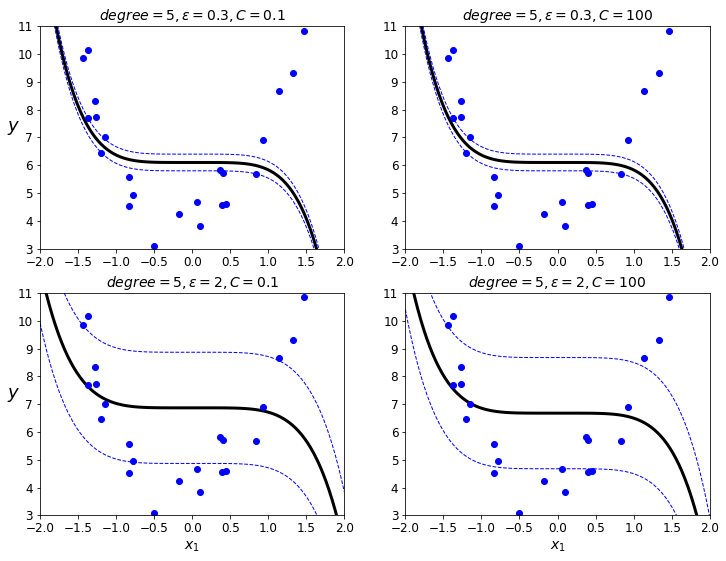

In [21]:
let_plot = 1
if let_plot:
    plt.figure(figsize=(12, 9))
    plt.subplot(2,2,1)
    xylim = [-2, 2, 3, 11]
    plot_svm_regression(svm_poly_reg1, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg1.degree, svm_poly_reg1.epsilon, svm_poly_reg1.C), fontsize=14)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    
    plt.subplot(2,2,2)
    plot_svm_regression(svm_poly_reg2, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg2.degree, svm_poly_reg2.epsilon, svm_poly_reg2.C), fontsize=14)
    
    plt.subplot(2,2,3)
    plot_svm_regression(svm_poly_reg3, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg3.degree, svm_poly_reg3.epsilon, svm_poly_reg3.C), fontsize=14)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.xlabel(r"$x_1$", fontsize=14)
    
    plt.subplot(2,2,4)
    plot_svm_regression(svm_poly_reg4, X, y, xylim)
    plt.title(r"$degree={}, \epsilon={}, C={}$".format(svm_poly_reg4.degree, svm_poly_reg4.epsilon, svm_poly_reg4.C), fontsize=14)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.show()

In [11]:
from sklearn.svm import SVR
m = 30 
X1 = 4*np.random.rand(m, 1) -2
y1 = (4 + 3*X1**2 + X1 + np.random.randn(m, 1)).ravel()
# Train 1 Gaussian SVM using Kernel trick 
Gaus_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVR(kernel="rbf", epsilon=0.6, C=0.001))  ])  
Gaus_kernel_svm_clf.fit(X1, y1)
Gaus_kernel_svm_clf.predict(X1)

# Train several Gaussian SVMs using Kernel trick 
epsilon1, epsilon2 = 0.2, 1.4
C1, C2 = 0.01, 1000
hyperparams = (epsilon1, C1), (epsilon1, C2), (epsilon2, C1), (epsilon2, C2)

svm_clfs = []
for epsilon, C in hyperparams:
    Gaus_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("", SVR(kernel="rbf", epsilon=epsilon, C=C)) ])
    Gaus_kernel_svm_clf.fit(X1, y1)
    svm_clfs.append(Gaus_kernel_svm_clf)

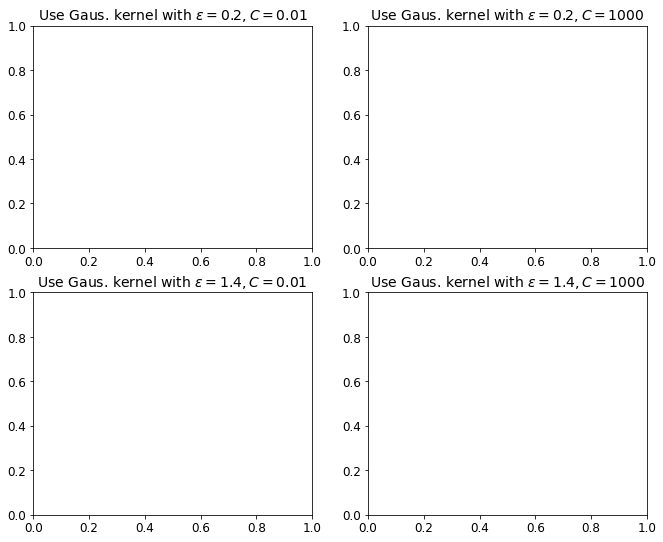

In [14]:
def plot_predictions(clf, axes, no_of_points=500):
    x0 = np.linspace(axes[0], axes[1], no_of_points)
    x1 = np.linspace(axes[2], axes[3], no_of_points)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]

    # Plot predicted labels (decision boundary)
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.12)  
    
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
    plt.axis(axes)
    #plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(11, 9))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(2,2,i+1)
    #plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    #plot_dataset(X1, y1, [-1.5, 2.45, -1, 1.5])
    epsilon, C = hyperparams[i]
    plt.title(r"Use Gaus. kernel with $\epsilon = {}, C = {}$".format(epsilon, C), fontsize=14)
    if i in (0, 1): 
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

In [15]:
from tensorflow import keras
from sklearn.svm import SVC 
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# 1.2. Reshape to 2D array: each row has 784 (28X28 pixel) features
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

svc_clf = SVC(kernel="linear", C=10000)
svc_clf.fit(X_train[:100], y_train[:100])
svr_clf = SVR(kernel="poly", degree=2, epsilon=0.7, C=10000)
svr_clf.fit(X_train[:100], y_train[:100])


ova_clf = OneVsRestClassifier(SVC())


# accuracy_score 0.972 với n_neighbors = [3, 4, 5] và weights = ['uniform', 'distance']
# best_params_ là n_neighbors = 4 và n_neighbors = distance
param_grid = {'kernel':('linear', 'rbf'), 'C':[0.01, 1, 10, 100]}

grid_search = GridSearchCV(ova_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train[:1000], y_train[:1000])
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_)

y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
